##### 【Problem 1 】 Acquisition of dataset

In [48]:
import pandas as pd

# Load the dataset
df = pd.read_csv("train.csv")

# Display the first few rows
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


【Problem 2 】 Survey of dataset itself

Dataset Overview:
Total Rows: 1,460

Total Columns: 81 (including the target variable SalePrice)

Key Observations:
Data Types:

Numerical Columns (38 total): Includes LotArea, YearBuilt, GrLivArea, SalePrice, etc.

Categorical Columns (43 total): Includes MSZoning, Street, Neighborhood, etc.

Missing Values:

LotFrontage (259 missing values)

Alley (almost completely missing—only 91 values)

FireplaceQu (half missing—770 values)

Garage-related columns (e.g., GarageType, GarageCond have ~81 missing values)

PoolQC (only 7 values present)

Fence & MiscFeature (highly sparse data)

##### 【Problem 3 】 Data verification

In [49]:
import pandas as pd

# Load dataset
df = pd.read_csv("train.csv")

# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Summary statistics for numerical columns
num_summary = df[num_cols].describe()

# Markdown Report
report = f'''
# **Data Verification Report**

## **1. Data Types**
- **Numerical Columns**: {len(num_cols)}
- **Categorical Columns**: {len(cat_cols)}

## **2. Column Names**
#### **Numerical Features** ({len(num_cols)} total):
{', '.join(num_cols)}

#### **Categorical Features** ({len(cat_cols)} total):
{', '.join(cat_cols)}

## **3. Summary Statistics of Numerical Data**
{num_summary}
'''

# Print the report
print(report)



# **Data Verification Report**

## **1. Data Types**
- **Numerical Columns**: 38
- **Categorical Columns**: 43

## **2. Column Names**
#### **Numerical Features** (38 total):
Id, MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SalePrice

#### **Categorical Features** (43 total):
MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical,

##### 【Problem 4 】 Response to missing values

In [50]:

# Step 1: Check missing values (total and percentage)
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

# Step 2: Create a DataFrame for missing values
missing_data = pd.DataFrame({'Feature': missing_values.index, 'Total Missing': missing_values.values, 'Missing Ratio': missing_percent.values})

# Step 3: Filter only features with missing values
missing_data = missing_data[missing_data['Total Missing'] > 0].sort_values(by='Missing Ratio', ascending=False)

# Step 4: Round the missing ratio to 2 decimal places
missing_data["Missing Ratio"] = missing_data["Missing Ratio"].round(2)

# Step 5: Display the table
display(missing_data)


,Feature,Total Missing,Missing Ratio
72,PoolQC,1453,99.52
74,MiscFeature,1406,96.30
6,Alley,1369,93.77
73,Fence,1179,80.75
25,MasVnrType,872,59.73
57,FireplaceQu,690,47.26
3,LotFrontage,259,17.74
58,GarageType,81,5.55
59,GarageYrBlt,81,5.55
60,GarageFinish,81,5.55


##### 【Problem 5 】 Terminology Survey

Sharpness (Kurtosis)
Sharpness refers to how peaked or flat a distribution is compared to a normal distribution.

Distortion (Skewness)
Distortion refers to the asymmetry of the distribution.

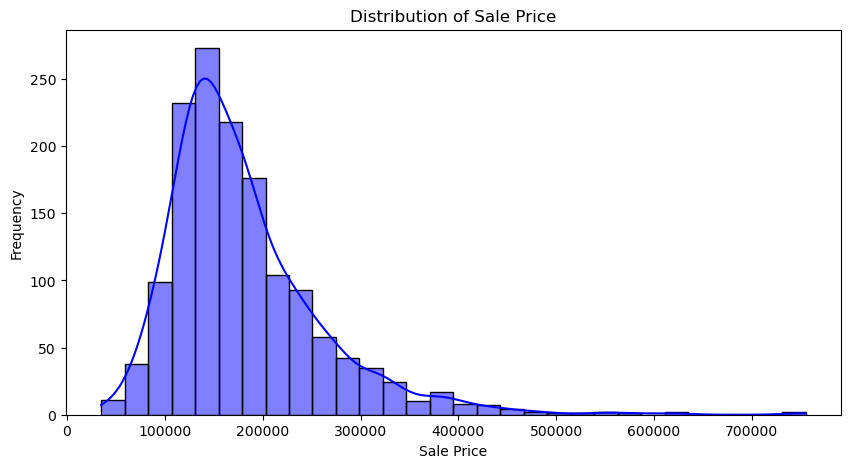

Skewness: 1.8829
Kurtosis: 6.5363


In [51]:
#import scipy.stats as stats

# Plot histogram and KDE
plt.figure(figsize=(10, 5))
sns.histplot(df['SalePrice'], kde=True, bins=30, color="blue")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.title("Distribution of Sale Price")
plt.show()

# Calculate skewness and kurtosis
skewness = df['SalePrice'].skew()
kurtosis = df['SalePrice'].kurtosis()

print(f"Skewness: {skewness:.4f}")  # Measure of asymmetry
print(f"Kurtosis: {kurtosis:.4f}")  # Measure of sharpness


##### 【Question 6】Sub-cloth confirmation

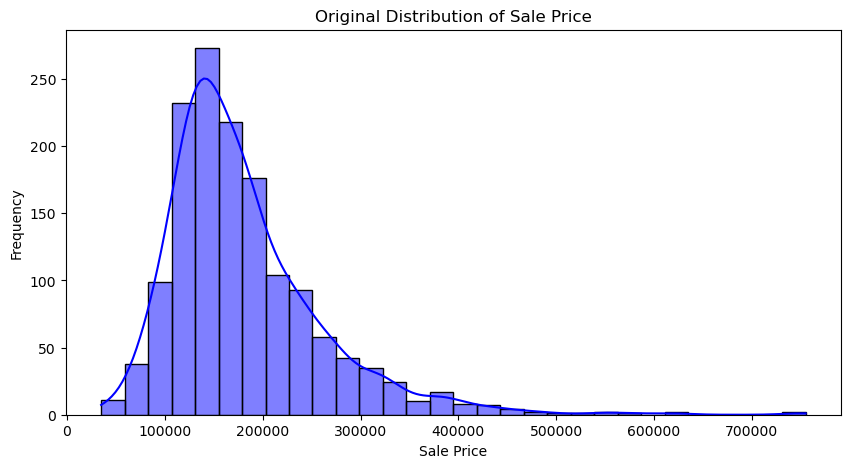

Original Skewness: 1.8829
Original Kurtosis: 6.5363


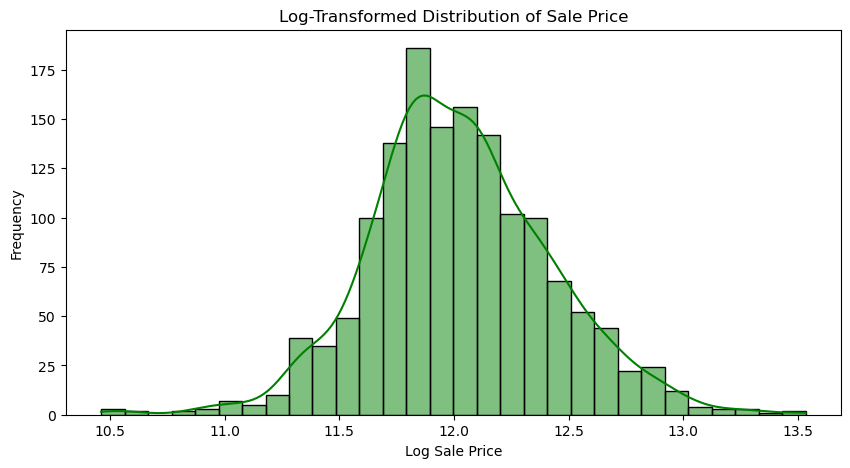

Log-Transformed Skewness: 0.1213
Log-Transformed Kurtosis: 0.8095


In [52]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Original Distribution (Histogram + KDE)
plt.figure(figsize=(10, 5))
sns.histplot(df['SalePrice'], kde=True, bins=30, color="blue")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.title("Original Distribution of Sale Price")
plt.show()

# Step 2: Calculate Skewness & Kurtosis (Before Log Transformation)
original_skewness = df['SalePrice'].skew()
original_kurtosis = df['SalePrice'].kurtosis()

print(f"Original Skewness: {original_skewness:.4f}")  # Measure of asymmetry
print(f"Original Kurtosis: {original_kurtosis:.4f}")  # Measure of sharpness

# Step 3: Log Transform the Target Variable
df['Log_SalePrice'] = np.log1p(df['SalePrice'])  # log(1 + x) to avoid log(0)

# Step 4: Visualize Log-Transformed Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Log_SalePrice'], kde=True, bins=30, color="green")
plt.xlabel("Log Sale Price")
plt.ylabel("Frequency")
plt.title("Log-Transformed Distribution of Sale Price")
plt.show()

# Step 5: Calculate Skewness & Kurtosis (After Log Transformation)
log_skewness = df['Log_SalePrice'].skew()
log_kurtosis = df['Log_SalePrice'].kurtosis()

print(f"Log-Transformed Skewness: {log_skewness:.4f}")
print(f"Log-Transformed Kurtosis: {log_kurtosis:.4f}")


##### 【Problem 7 】 Confirm correlation coefficient

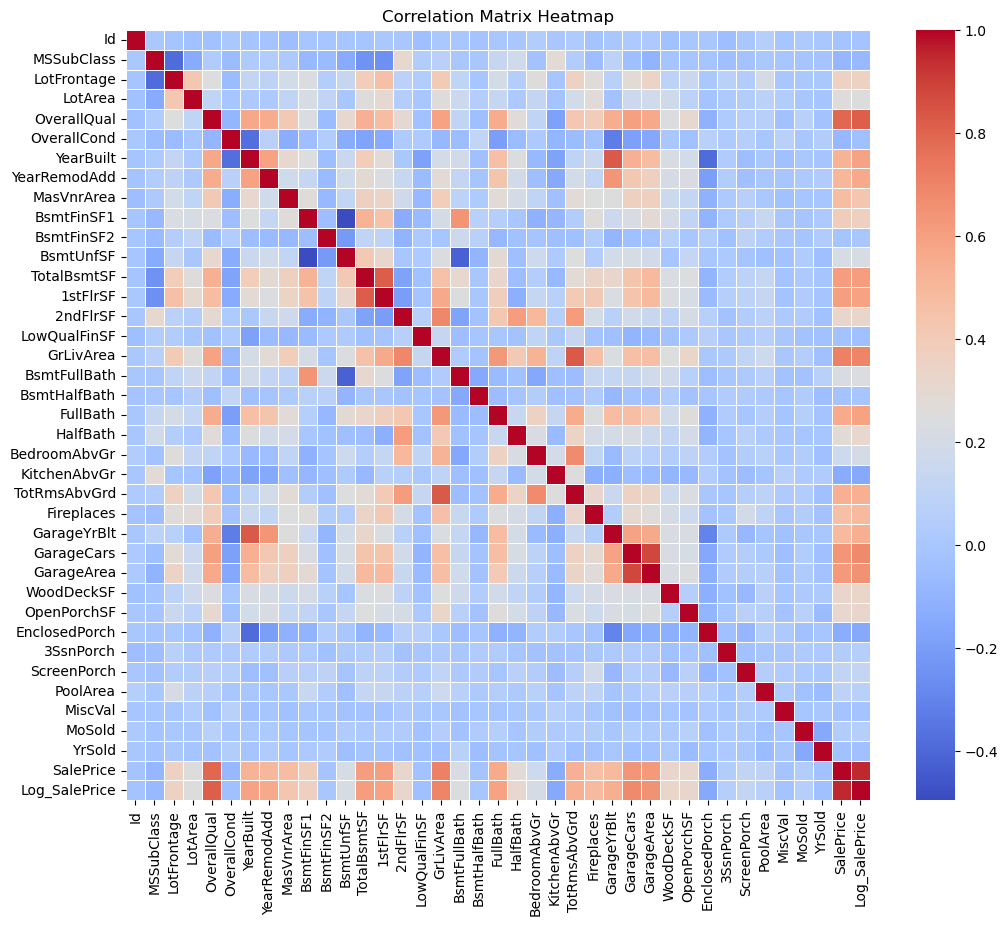

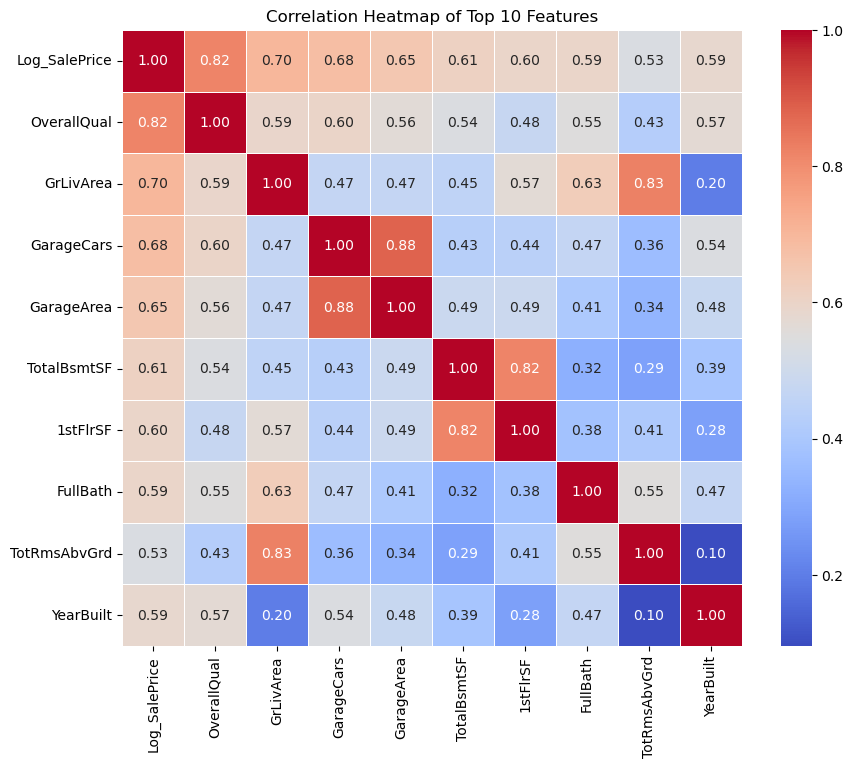

Highly Correlated Feature Pairs (Threshold > 0.75):
Log_SalePrice - OverallQual: 0.82
GrLivArea - TotRmsAbvGrd: 0.83
GarageCars - GarageArea: 0.88
TotalBsmtSF - 1stFlrSF: 0.82


In [53]:


# Step 1: Convert categorical variables to numeric or drop them
df_numeric = df.select_dtypes(include=['number'])  # Keep only numeric columns

# Step 2: Compute the Correlation Matrix (Numeric Only)
corr_matrix = df_numeric.corr()

# Step 3: Heatmap of the Full Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Step 4: Select Top 10 Features Most Correlated with SalePrice
top_10_features = corr_matrix['SalePrice'].abs().sort_values(ascending=False)[1:11]  # Exclude SalePrice itself
top_10_names = top_10_features.index.tolist()

# Step 5: Heatmap for Top 10 Features
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric[top_10_names].corr(), cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Top 10 Features")
plt.show()

# Step 6: Find Highly Correlated Feature Pairs
high_corr_pairs = []
corr_threshold = 0.75  # Threshold for high correlation
corr_top_10 = df_numeric[top_10_names].corr()

for i in range(len(top_10_names)):
    for j in range(i + 1, len(top_10_names)):
        if abs(corr_top_10.iloc[i, j]) > corr_threshold:
            high_corr_pairs.append((top_10_names[i], top_10_names[j], corr_top_10.iloc[i, j]))

# Display Highly Correlated Feature Pairs
print("Highly Correlated Feature Pairs (Threshold > 0.75):")
for pair in high_corr_pairs:
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.2f}")
